# 머신 러닝

### 문제 1. 자전거 대여 수요(count) 예측

#### 주요 Feature 설명 : bike_train.csv
***
- datatime : 날짜

- season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울

- holiday : 1 = 주말 및 휴일, 0 = 평일

- workingday: 1 = 주중, 0 = 주말 및 휴일

- weather : 1 = 맑음, 약간 구름 낀 흐림, 2 = 안개, 안개 + 흐림, 3 = 가벼운 눈, 가벼운 비 + 천둥, 4 = 심한 눈/비, 천둥/번개

- temp : 온도(섭씨)

- atem : 체감 온도(섭씨)

- humidity : 상대 습도

- windspeed : 풍속

- casual : 미등록 사용자 대여수

- registered : 등록된 사용자 대여수

- count : 대여 횟수(casual + registered)
***

### 1-1) Train 데이터셋을 이용하여 탐색적 데이터 분석을 시행 하고, 시각화와 함께 그 결과에 대해 논하시오

In [ ]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('./bike_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['season'] = df['season'].astype(object)
df['workingday'] = df['workingday'].astype(object)
df['holiday'] = df['holiday'].astype(object)
df['weather'] = df['weather'].astype(object)

df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000


In [ ]:
df.describe(include='O')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- 10886개 행의 데이터이며 변수는 총 12개이며 날짜변수 1개, 독립변수와 10개와 종속변수 1개(count)로 구성된 데이터 셋이다
- 독립변수 중 날짜변수 datetime 1개, 범주형 자료 4개('season', 'holiday', 'workingday', 'weather')로 데이터 타입을 변경함
- 독립변수의 수치형 자료 6개('temp', 'atemp','humidity', 'windspeed', 'casual', 'registered')이다.
- 종속변수는 수치형자료 count다.
- 결측치는 없다

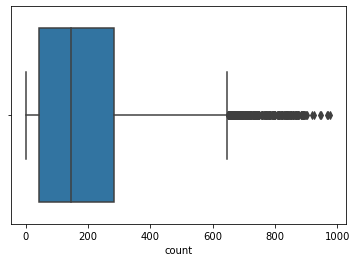

In [ ]:
# 종속변수
sns.boxplot(df['count'])
plt.show()

In [ ]:
print('왜도:',df['count'].skew()) # 오른쪽으로 긴꼬리
print('첨도:',df['count'].kurt()) # 완만 

왜도: 1.2420662117180776
첨도: 1.3000929518398334


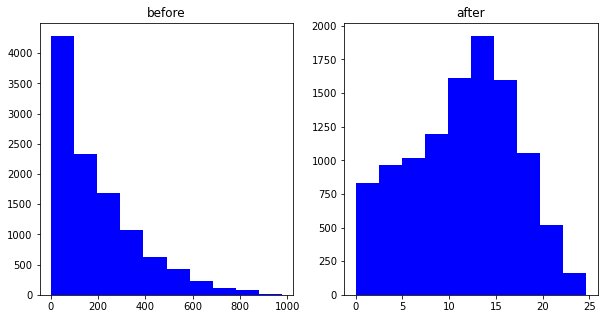

AndersonResult(statistic=59.06040087501606, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [ ]:
# 종속변수 : 변환
import scipy.stats as stats
fig, ax = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x='count',data = df, color='b') 
plt.title('before')
plt.subplot(1,2,2)
count_boxcox, lam = stats.boxcox(df['count'])
plt.hist(x= count_boxcox, color='b')
plt.title('after')

plt.show()

print(stats.anderson(count_boxcox)) # >5000
df['count_bcx'] = count_boxcox

In [ ]:
print('왜도:',df['count_bcx'].skew()) # 비교적 정규분포
print('첨도:',df['count_bcx'].kurt()) # 완만 

왜도: -0.1539524621267384
첨도: -0.8146251742519137


In [ ]:
# 독립변수
category = list(df.select_dtypes(object).columns)
numeric = list(df.select_dtypes(exclude=object).columns)
numeric.remove('count') # target변수

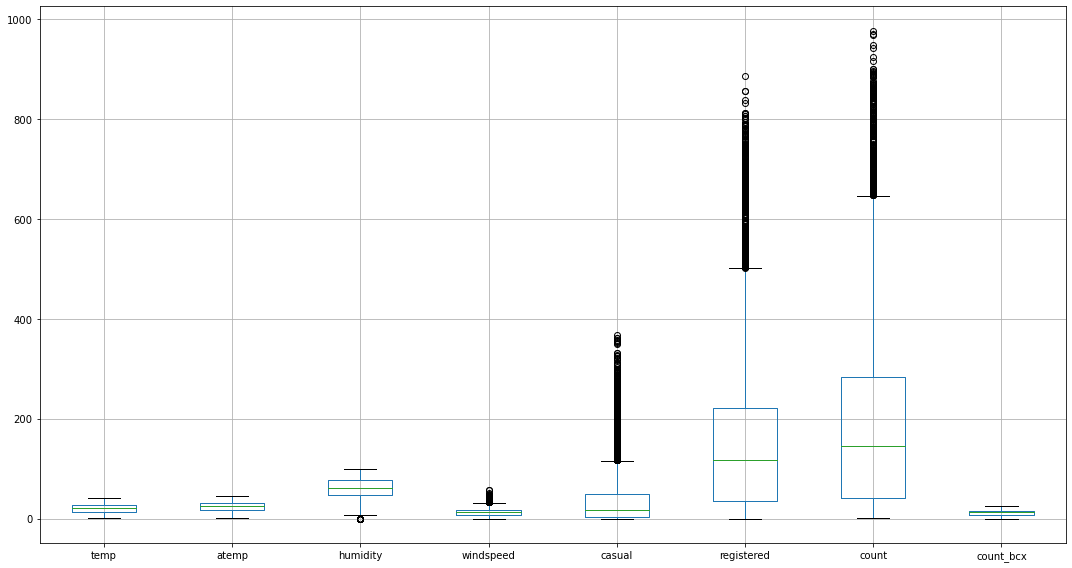

In [ ]:
# 수치형(한번에)
df.boxplot(figsize=(15,8))
plt.tight_layout()
plt.show()

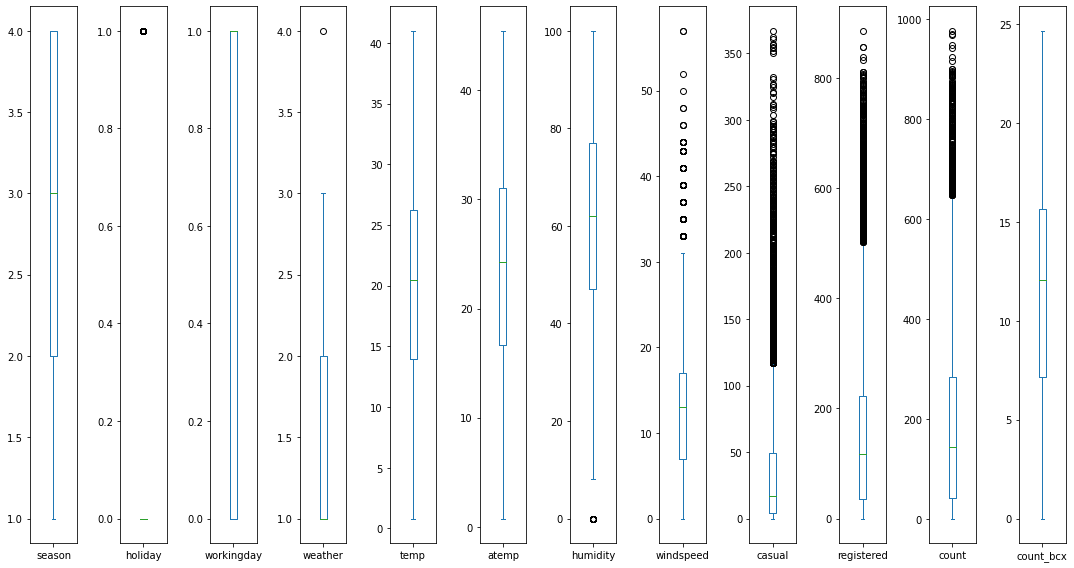

In [ ]:
# 수치형(각각)
df.plot(kind='box',figsize=(15,8),subplots=True)
plt.tight_layout()
plt.show()

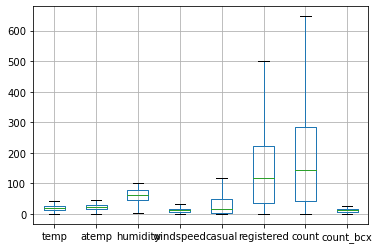

In [ ]:
# 이상치 처리 , 윈저화 (IQR 기준)
df2 = df.copy()

for col in df.columns:
    if type(df[col][0]) == str: #범주형 변수는 pass
        continue
    else:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        top = df[col].quantile(0.75) + IQR*1.5
        down = df[col].quantile(0.25) - IQR*1.5
        df2[col] = df[col].clip(top, down)
df2.boxplot()
plt.show()

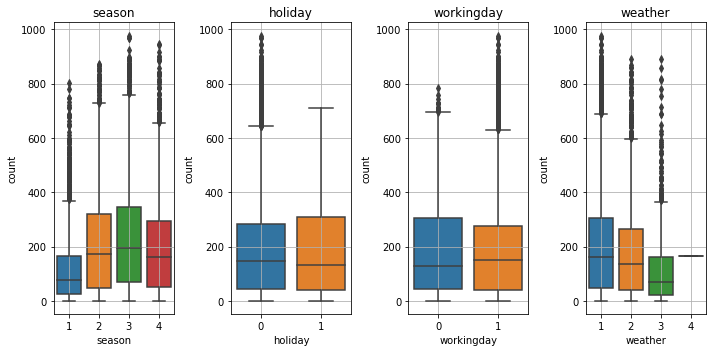

In [ ]:
# with 범주형변수
plt.figure(figsize=(10,5))
n=1
for col in category:
    plt.subplot(1,4,n)
    sns.boxplot(y = df['count'], x = col, data=df)
    plt.title(col)
    plt.grid()
    n +=1
plt.tight_layout()
plt.show()

In [ ]:
df[df.weather==4] # 날씨가 최악인데 수요가 있음 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_bcx
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,12.678392


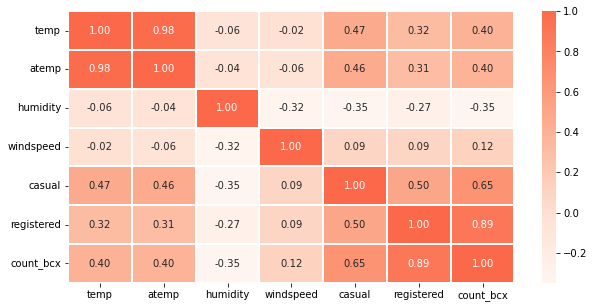

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.loc[:,numeric].corr(), cmap='Reds', annot=True,
            fmt='.2f', linecolor='white', linewidths=0.4, center=True)
plt.show()

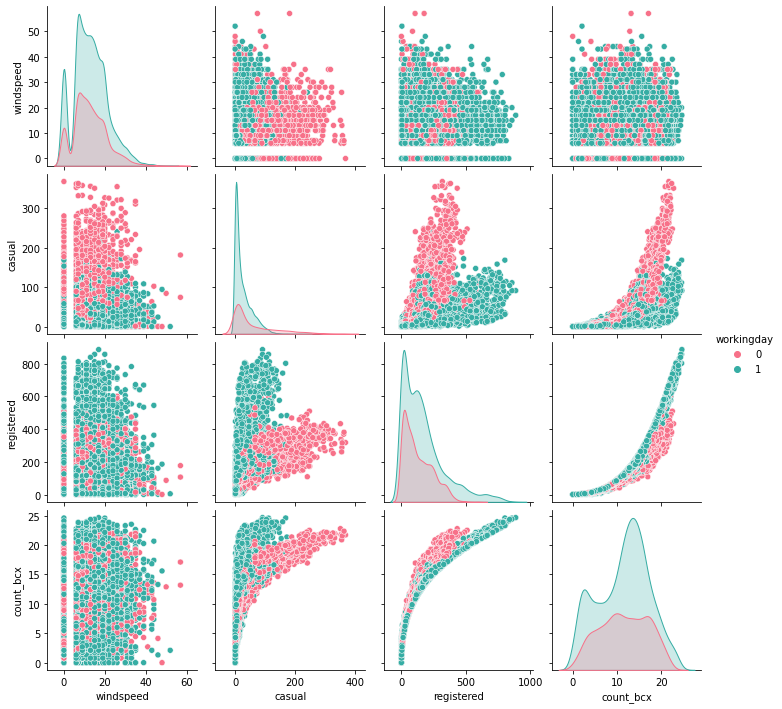

In [ ]:
sns.pairplot(data = df.loc[:,numeric[4:]+['workingday']], hue='workingday', palette='husl')
plt.show()

In [ ]:
df = df.drop(['atemp', 'registered'], axis=1) 

- 회귀 및 예측 성능 개선을 위해 종속변수의 경우 boxcox변환을 통해 데이터의 중심으로 모아줬다. 하지만 정규성 검정을 위해 anderson 검정 결과 정규성은 만족하지 않았다.
- 범주형 변수 4가지에 대해 종속변수 count에 대한 박스플롯 결과, season은 가을>여름>겨울>봄, holiday는 주말 및 휴일>평일, workingday는 주중 및 휴일 > 평일, weather는  1>2>4>3(1 = 맑음, 약간 구름 낀 흐림, 2 = 안개, 안개 + 흐림, 3 = 가벼운 눈, 가벼운 비 + 천둥, 4 = 심한 눈/비, 천둥/번개)이었다.
- 수치형변수간 상관계수를 보니 (temp, atemp)는 상관계수가 0.98로 다중공선성이 있으며 registered와 casual간에 2개의 선형성이 존재하여 workingday기준으로 보니 주중에는 등록된 사용자가, 주말 및 휴일에는 미등록 사용자가 대여를 많이 한다는 것을 알 수 있다.
- 다중공선성 높은 atemp, registered 삭제 처리

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,count_bcx
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,16,4.433145
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,40,6.982674
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,32,6.292274
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,13,3.950910
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,0.000000


### 1-2) Train 데이터 셋을 8:2 비율로 데이터를 분할하고, 전처리를 수행하시오 

In [ ]:
# 분할을 위해 다시 변수 불러오기 
category = list(df.select_dtypes(object).columns)
numeric = list(df.select_dtypes(exclude=object).columns)
numeric.remove('count') # target변수
numeric.remove('count_bcx')# target 변환 변수

In [ ]:
print(category)
print(numeric)

['season', 'holiday', 'workingday', 'weather']
['datetime', 'temp', 'humidity', 'windspeed', 'casual']


In [ ]:
# 인코딩
cat = pd.get_dummies(df.loc[:,category], drop_first=True)

# 스케일링
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num = pd.DataFrame(
    sc.fit_transform(df.loc[:,numeric[1:]]), # 'datetime' 제외하고 
    columns = numeric[1:])
X = pd.concat([cat, num], axis=1)
y = df['count']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

### 1-3) Ridge 회귀분석을 수행하는데, 0~1까지 0.1간격으로 alpha를 조절하여 만든 모델중 ${R}^2$ 최적인 모델에 대해 1-2)에서 분할된 test set으로 예측한 값들에 대해 ${R}^2$와 RMSE를 구하시오.

In [ ]:
# baseline model
from sklearn.linear_model import Ridge

base_model = Ridge(random_state=0)
fit = base_model.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

parmas = {'alpha' : list(np.linspace(0,1,10).round(1))} # [0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
gridcv = GridSearchCV(base_model, param_grid=parmas, scoring='r2', cv =5, refit=True)
# refit=True, 최적의 파라미터를 찾으면 이걸 기준으로 다음 학습


s = time.time()
gridcv.fit(X_train, y_train)
print('모델링 시간 : ', time.time()-s)

print('최적의 하이퍼파라미터 :',gridcv.best_params_)
print('fitted R2값 :',gridcv.best_score_)

모델링 시간 :  0.17500853538513184
최적의 하이퍼파라미터 : {'alpha': 1.0}
fitted R2값 : 0.5540621017117183


In [ ]:
# 최적 모델 선정
best_model = gridcv.best_estimator_
pred_initial = base_model.predict(X_test)
pred_final = best_model.predict(X_test)

In [ ]:
# 성능평가 함수 정의
from sklearn.metrics import mean_squared_error, r2_score

def eval_reg(model, y_test, pred):
    RMSE = np.sqrt(mean_squared_error(y_test, pred))
    R2 = r2_score(y_test, pred)
    print("{0} 모델의 RMSE는 {1}, R2는 {2}".format(model.__class__.__name__, RMSE.round(3),R2.round(3)) )

In [ ]:
eval_reg(best_model, y_test, pred_final)

Ridge 모델의 RMSE는 121.921, R2는 0.553


### 1-4) 마찬가지로 Lasso 회귀분석을 수행하고, 0~1까지 0.1간격으로 alpha를 조절하여 만든 모델중 ${R}^2$ 최적인 모델에 대해 1-2)에서 분할된 test set으로 예측한 값들에 대해 ${R}^2$와 RMSE를 구하시오

In [ ]:
# baseline model
from sklearn.linear_model import Lasso

base_model = Lasso(random_state=0)
fit = base_model.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

parmas = {'alpha' : list(np.linspace(0,1,10).round(1))} # [0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
gridcv = GridSearchCV(base_model, param_grid=parmas, scoring='r2', cv =5, refit=True)
# refit=True, 최적의 파라미터를 찾으면 이걸 기준으로 다음 학습

s = time.time()
gridcv.fit(X_train, y_train)
print('모델링 시간 : ', time.time()-s)

print('최적의 하이퍼파라미터 :',gridcv.best_params_)
print('fitted R2값 :',gridcv.best_score_)

모델링 시간 :  0.5412535667419434
최적의 하이퍼파라미터 : {'alpha': 0.0}
fitted R2값 : 0.5540615928165715


In [ ]:
# 최적 모델 선정
best_model = gridcv.best_estimator_
pred_initial = base_model.predict(X_test)
pred_final = best_model.predict(X_test)

In [ ]:
eval_reg(best_model, y_test, pred_final)

Lasso 모델의 RMSE는 121.922, R2는 0.553


### 1-5) 3가지 회귀 트리 모델을 선택하여 모형 학습 및 예측/변수 중요도를 시각화를 하시오        

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

rf = RandomForestRegressor(random_state=7)
svr = SVR(kernel='linear') # default = 'rbf'
xgb = XGBRegressor(random_state=7)
fit1 = rf.fit(X_train, y_train)
fit2 = svr.fit(X_train, y_train)
fit3 = xgb.fit(X_train, y_train)

In [ ]:
pred1 = fit1.predict(X_test)
pred2 = fit2.predict(X_test)
pred3 = fit3.predict(X_test)

In [ ]:
preds = [pred1, pred2, pred3]
models = [fit1, fit2, fit3]
for model, pred in zip(models, preds):
    eval_reg(model, y_test, pred)

RandomForestRegressor 모델의 RMSE는 104.979, R2는 0.668
SVR 모델의 RMSE는 128.928, R2는 0.5
XGBRegressor 모델의 RMSE는 106.639, R2는 0.658


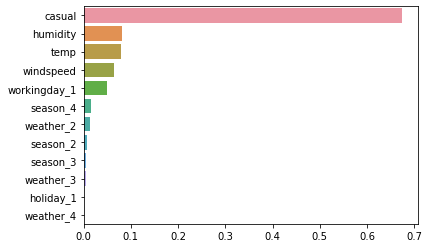

In [ ]:
imp1 = fit1.feature_importances_
sns.barplot(x = pd.Series(imp1, index = X_train.columns).sort_values(ascending=False),
            y= pd.Series(imp1, index = X_train.columns).sort_values(ascending=False).index)
plt.show()

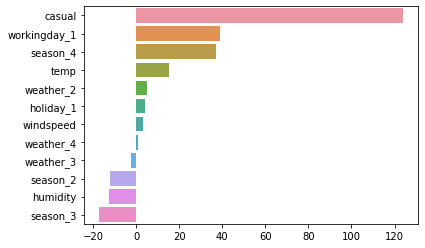

In [ ]:
imp2 = fit2.coef_
sns.barplot(x = pd.Series(fit2.coef_.ravel(), index = X_train.columns).sort_values(ascending=False),
            y = pd.Series(fit2.coef_.ravel(), index = X_train.columns).sort_values(ascending=False).index)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

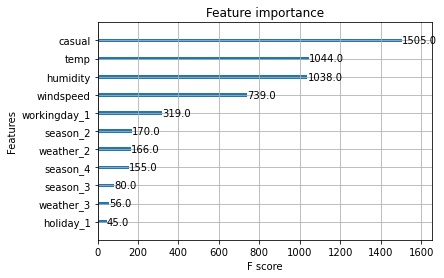

In [ ]:
from xgboost import plot_importance
plot_importance(fit3)

- 랜덤포레스트, SVR, XGboost로 모델링을 하였으며 랜덤포레스트가 RMSE가 가장 낮은 104.979로 우수한 성능을 보여주었으며 R2는 66.8%이었다.
- RandomForestRegressor 모델의 RMSE는 104.979, R2는 0.668
- SVR 모델의 RMSE는 128.928, R2는 0.5
- XGBRegressor 모델의 RMSE는 106.639, R2는 0.658
- 3개 모델중에 성능이 제일 좋은 랜덤포레스트, XGboost기준으로 변수중요도를 보면 casual, temp, humidity, windspeed순임을 알 수 있다.

# 통계 분석

## 문제 2. 시계열 분석 - 삼성전자 종가(Close) 예측

### 주요 Feature 설명 : samsung.csv
***
Close: 종가 - 주식 시장이 마감했을 때의 가격

Open: 시가 - 주식 시장이 시작했을 때의 가격

High: 최고가

Low: 최저가

Volume: 거래량

Change: 증감률 - 어제 종가 대비 오늘 종가의 증감률
***

In [ ]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

### 2-1) EDA 및 전처리를 수행 하시오

In [ ]:
df2 = pd.read_csv('./samsung.csv')
df2.Date = pd.to_datetime(df2.Date)


In [ ]:
df2['Date'] = df2.set_index(keys=df2['Date'], inplace=True)

In [ ]:
# df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
# df = df.set_index('date')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 413 entries, 2020-01-02 to 2021-08-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    413 non-null    int64  
 1   High    413 non-null    int64  
 2   Low     413 non-null    int64  
 3   Close   413 non-null    int64  
 4   Volume  413 non-null    int64  
 5   Change  413 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 22.6 KB


- 413개의 시계열 데이터이며 Date 날짜 데이터를 인덱스 처리 했다.
- 독립변수는 삼성 주식에 대한 시가,최저,최고,거래량, 증감률 5개이며 종속변수는 종가(close)이다.
- 결측값은 없다

### 2-2) 데이터 셋을 7:3의 비율로 데이터를 분할 하고 , 시계열 분석을 수행하시오

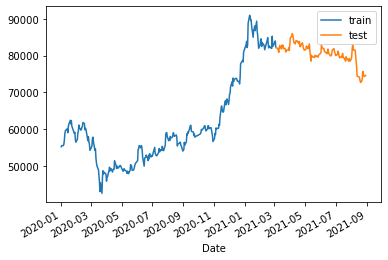

In [ ]:
train = df2[0:int(len(df2)*0.7)]['Close']
test = df2[int(len(df2)*0.7):]['Close']

train.plot(label='train')
test.plot(label='test')
plt.legend()
plt.show()

In [ ]:
train.head()

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
Name: Close, dtype: int64

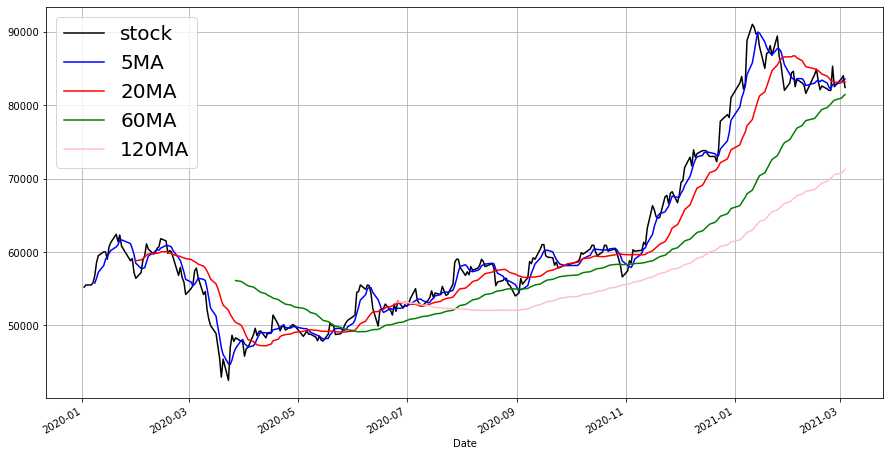

In [ ]:
plt.figure(figsize=(15,8))
train.plot(color='black', label='stock')
train.rolling(window=5).mean().plot(color='b', label='5MA')
train.rolling(window=20).mean().plot(color='r', label='20MA')
train.rolling(window=60).mean().plot(color='green', label='60MA')
train.rolling(window=120).mean().plot(color='pink', label='120MA')
plt.grid()
plt.legend(fontsize=20)
plt.show()

In [ ]:
# 정상성 확인
from statsmodels.tsa.stattools import adfuller, kpss
warnings.filterwarnings('ignore')
print('p -value : ' ,adfuller(train)[1]) # 기각해야 함. H0 : 정상시계열이 아니다. 
print('p -value : ' , kpss(train)[1]) # 채택해야 함, H0 : 정상시계열이다.

p -value :  0.9517709986190926
p -value :  0.01


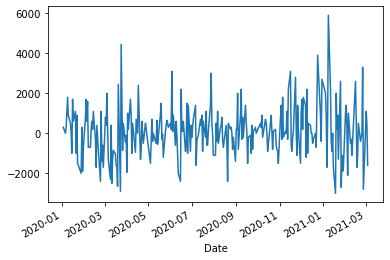

In [ ]:
# 1차분 실시
diff1 = train - train.shift()
diff1.plot()
plt.show()

In [ ]:
print('p -value : ', adfuller(diff1.dropna())[1]) # 기각해야 함. H0 : 정상시계열이 아니다. 
print('p -value : ' , kpss(diff1.dropna())[1]) # 채택해야 함, H0 : 정상시계열이다.

p -value :  1.4630999383137943e-29
p -value :  0.1


In [ ]:
# !pip install --upgrade statsmodels==0.14.0
import statsmodels.api as sm
sm.tsa.stattools.acf(train, nlags = 50) # 시차 50까지의 자기상관성 0~1 'nlags'


array([1.        , 0.98797161, 0.9749678 , 0.96188682, 0.94953831,
       0.93545317, 0.92398271, 0.91296569, 0.90084178, 0.88753864,
       0.87369161, 0.86028964, 0.84657855, 0.8336415 , 0.8228944 ,
       0.81151652, 0.79888999, 0.78481713, 0.77036082, 0.75516397,
       0.74001172, 0.72540428, 0.71134199, 0.69691299, 0.68117978,
       0.66366282, 0.64485253, 0.62909094, 0.61273067, 0.59640942,
       0.5801603 , 0.56512913, 0.54785813, 0.52870263, 0.5097355 ,
       0.49061349, 0.47013026, 0.45038282, 0.43300298, 0.41629975,
       0.39774181, 0.37956156, 0.36361487, 0.34965753, 0.33617993,
       0.32283427, 0.31127935, 0.30051489, 0.28860029, 0.27688952,
       0.26481095])

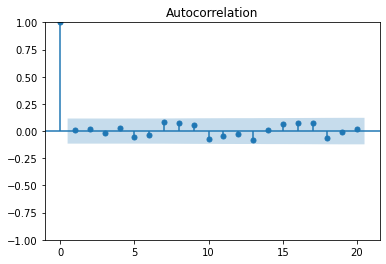

In [ ]:
# ACF
sm.graphics.tsa.plot_acf(diff1.dropna(), lags = 20) # '위와 다름!! lags'
plt.show()
# 시차에 따라 0시점 이후로 절단

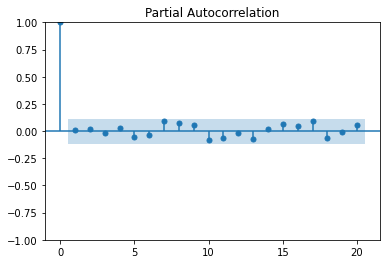

In [ ]:
# PACF
sm.graphics.tsa.plot_pacf(diff1.dropna(), lags = 20) # '위와 다름!! lags'
plt.show()

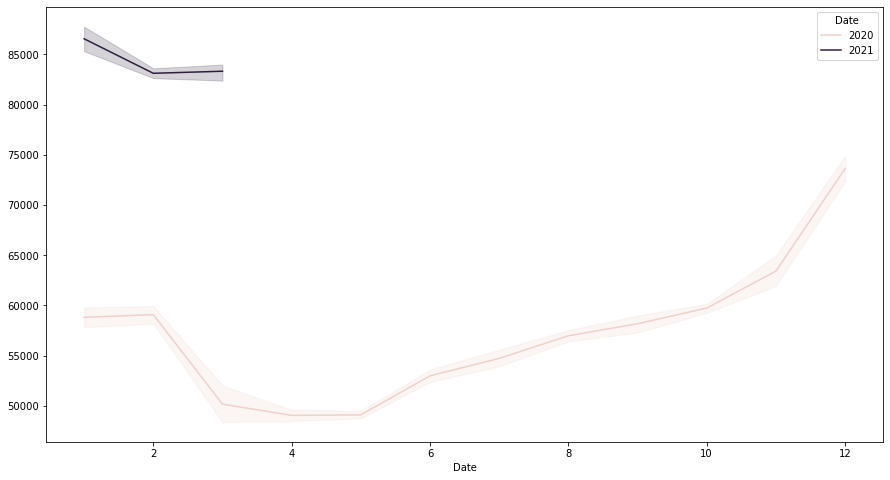

In [ ]:
# 계절성
plt.figure(figsize=(15,8))

sns.lineplot(x = train.index.month, y = train.values, hue = train.index.year)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA # arima_model ---> arima.model

model = ARIMA(train, order=(0,1,0))
res = model.fit()

In [ ]:
pred = res.forecast(len(test))

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  289
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2466.214
Date:                Sun, 29 May 2022   AIC                           4934.428
Time:                        20:21:52   BIC                           4938.091
Sample:                             0   HQIC                          4935.896
                                - 289                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.599e+06   9.63e+04     16.608      0.000    1.41e+06    1.79e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                46.72
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             0.53
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 2-3) 잔차 검정을 수행하고, 테스트 데이터를 예측 및 시각화를 수행 하시오

In [ ]:
r = res.resid
print(adfuller(r)[1])
print(kpss(r)[1])

0.0
0.1


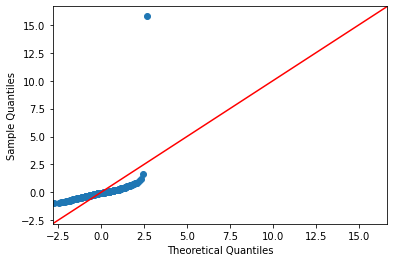

In [ ]:
import statsmodels.api as sm
sm.qqplot(r, fit=True, line='45')
plt.show()

In [ ]:
sm.stats.acorr_ljungbox(r, lags=20, return_df=True) # 융검정, H0: 백색잡음이다.

,lb_stat,lb_pvalue
1,0.005047,0.943362
2,0.005327,0.997340
3,0.005901,0.999880
4,0.097221,0.998856
5,0.214284,0.998952
6,0.236116,0.999749
7,0.333558,0.999857
8,0.357249,0.999963
9,0.389179,0.999990
10,0.464399,0.999995


### 2-4) 테스트 데이터에 대한 평가지표 MAPE 값을 도출 하시오

<font size="5">$MAPE = \frac{100\%}{n}\sum_{t=1}^{n}\frac{\vert F_{t}-A_{t}\vert}{\vert A_{t} \vert}$</font>


In [ ]:
pred = pred.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
MAPE = np.sum(np.abs(pred - test)/np.abs(test))/len(test)*100
MAPE.round(2)

2.88

### 2-5) 모형 성능 개선을 하기 위해서 전략 및 구현을 하시오(ex: refresh)

- GridSearch를 통한 ARIMA p,d,q 찾는 iteration 실시

## 문제 3. 통계분석(명목형 변수 검정)

### 3개의 모델의 분류 결과 값에 대하여 모델의 분류 정확도 간에 차이가 있는지 검정 하시오

In [ ]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0])
y_model_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])
y_model_2 = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])
y_model_3 = np.array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1])

data = pd.DataFrame({'y_true':y_true, 'model_1':y_model_1, 
                         'model_2':y_model_2, 'model_3':y_model_3 })

data =1-data

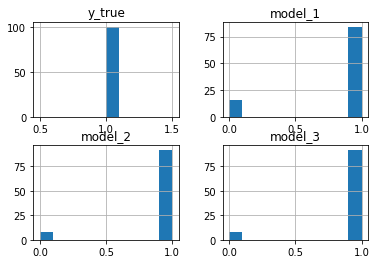

In [ ]:
data.hist()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
p1 = accuracy_score(data['y_true'],data.iloc[:,1])
p2 = accuracy_score(data['y_true'],data.iloc[:,2])
p3 = accuracy_score(data['y_true'],data.iloc[:,3])
p1,p2,p3

(0.84, 0.92, 0.92)

In [ ]:
import scipy.stats as stats
# 세 모집단의 비교 검정
# H0: 모델 3개의 정확도는 차이가 없다.
# H1: 모델 3개의 정확도는 차이가 있다.
stats.friedmanchisquare(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3])

FriedmanchisquareResult(statistic=7.529411764706171, pvalue=0.023174427241057897)

## 문제4. 상관관계 분석
### 한 수출기업에서 원-달러 환율과 수출액 간의 관계를 분석하기 위하여 한 지점의 최근 10개월간의 데이터를 수집한 결과가 다음과 같다. (유의수준 5%)

아래 데이터는 4-1), 4-2)에서 사용 되는 데이터

|월|1|2|3|4|5|6|7|8|9|10|
|---|---|---|---|---|---|---|---|---|---|---|
|환율|1095|1110|1086|1074|1098|1105|1163|1124|1088|1064|
|수출액|53.655|57.72|52.128|52.626|54.9|56.355|58.15|57.324|53.312|51.072|


#### 문제 4-1) 환율과 수출액 간에 상관관계가 있는지 검정 하시오 

In [ ]:
data = \
pd.DataFrame({'환율':[1095,1110,1086,1074,1098,1105,1163, 1124,1088,1064],
              '수출액':[53.655, 57.72, 52.128, 52.626, 54.9, 56.355, 58.15, 57.324, 53.312, 51.072]},index=[1,2,3,4,5,6,7,8,9,10]).T
data

,1,2,3,4,5,6,7,8,9,10
환율,1095.000,1110.00,1086.000,1074.000,1098.0,1105.000,1163.00,1124.000,1088.000,1064.000
수출액,53.655,57.72,52.128,52.626,54.9,56.355,58.15,57.324,53.312,51.072


In [ ]:
stats.shapiro(data.loc['환율'])
stats.shapiro(data.loc['수출액'])

ShapiroResult(statistic=0.9301379323005676, pvalue=0.44925031065940857)

In [ ]:
import scipy.stats as stats
stats.pearsonr(data.loc['환율'], data.loc['수출액'])

(0.8811918008908425, 0.000753463855233638)

- 가설설정(H0 : 환율과 수출액은 상관관계가 없다, H1:~있다)
- 둘다 정규성을 만족하므로 피어슨 상관계수 검정 실시
- 상관관계는 0.88 , p-value= 0.0008이므로 유의수준 0.05보다 작으며 귀무가설을 기각한다
- 환율과 수출액은 상관관계가 유의미하다.

#### 문제 4-2) 환율과 수출액간의 상관계수가 0.9라고 할수 있는지 검정 하시오
***

In [ ]:
r = stats.pearsonr(data.loc['환율'], data.loc['수출액'])[0] # 표본상관계수
n = len(data.loc['환율']) # or len(data.loc['수출액'])
t = (r-0.9)/((1-r**2)/np.sqrt((n-2)))# ~t(n-2) under H0

In [ ]:
alpha=0.05
c = stats.t.ppf(alpha/2, n-2)
print('기각역에 대한 임계치 :{0:.2f}이며 검정통계량 {1:.2f}이므로 기각역에 속하지 않아 귀무가설을 기각하지 않게 됨.'.format(c,t))

기각역에 대한 임계치 :-2.31이며 검정통계량 -0.24이므로 기각역에 속하지 않아 귀무가설을 기각하지 않게 됨.


In [ ]:
print('p-value : ',2*stats.t.cdf(t,n-2))

p-value :  0.8178489392031554


- 1. 가설설정 : 양측검정 실시

- 귀무가설 : 환율과 수출액간의 상관계수가 0.9라고 할 수 있다.
- 대립가설 : 환율과 수출액간의 상관계수가 0.9라고 할 수 없다.


- 2. 검정통계량, 검정통계량 분포
t = 5.27
검정통계량 t=5.27 > c=-0.24임계치), $H_{0}$기각하지 못함
- p-value = 0.818
- 3. 검정 결과
환율과 수출액간의 상관계수는 0.9라고 할 수 있다

#### 문제 4-3) 어느 공장에서 작업자의 “결근횟수”와 “생산량”이 서로 상관관계가 있는지를 파악하는 중이다. 그래서 과거의 데이터를 분석해서 총 15개의 표본을 뽑았더니, 상관계수는 -0.45가 나왔다. 그럼 “결근횟수”와 “생산량”은 서로 상관관계가 있다고 할 수 있는지 유의수준 5%에서 검정하시오.

In [ ]:
# H0 : “결근횟수”와 “생산량”은 서로 상관관계가 없다.

n=15
r=-0.45
t = r*(n-2)/np.sqrt(1-r**2)
t
stats.t.cdf(t,n-2)*2
# H0를 기각, 상관관계가 있다 

1.851433295863191e-05

## 문제 5 회귀분석 (문제 4번의 환율과 수출액간의 데이터를 이용)
#### 5-1) 환율을 독립변수, 수출액을 종속변수로 놓고 추정된 회귀식 및 회귀 모형을 검정 하시오

In [ ]:
data = data.T

In [ ]:
from statsmodels.formula.api import ols
fit = ols('수출액 ~ 환율', data=data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수출액   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     27.79
Date:                Sun, 29 May 2022   Prob (F-statistic):           0.000753
Time:                        20:40:53   Log-Likelihood:                -15.468
No. Observations:                  10   AIC:                             34.94
Df Residuals:                       8   BIC:                             35.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.3577     16.712     -1.996      0.081     -71.896       5.181
환율             0.0800      0.015      5.272      0.001       0.045       0.115
==============================================================================
Omnibus:                        0.657   Durbin-Watson:                   3.058
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.523
Skew:                           0.456   Prob(JB):                        0.770
Kurtosis:                       2.349   Cond. No.                     4.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. 가설설정
H0 : 회귀모형은 유의하다.
2. t검정
t = 5.272이고 이에 대한 p-value=0.001이다.
3. 검정결과 : p-value < 0.05(유의수준)이므로 H0를 기각하게 되며 위 회귀모형은 유의하다는 것을 알 수 있다.

#### 5-2) 위에서 구한 회귀식이 유용한지 아니면 유용하지 않는지 모형의 적합성 검정(분산분석)을 수행하시오

In [ ]:
from statsmodels.stats.anova import anova_lm
model = ols('수출액 ~ 환율', data=data).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
환율,1.0,44.865380,44.86538,27.794022,0.000753
Residual,8.0,12.913678,1.61421,NaN,NaN


#### 5-3) 환율이 1200일때 예상되는 수출액에 대한 95% 신뢰구간과 95% 예측구간을 구하시오

In [ ]:
yhat = 1200
alpha = 0.05
n = 10
se = 0.015

t_critical_value = stats.t.ppf(1-alpha/2, n-2)*se

CI_L = yhat - t_critical_value
CI_U = yhat + t_critical_value
CI_L, CI_U

(1199.9654099379745, 1200.0345900620255)